<a href="https://colab.research.google.com/github/EkaFitriRamadani/MachineLearning/blob/main/NaiveBayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Bayesian**

In [ ]:
# import library
import os
import numpy as np
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/Datasets/winequalityN.csv'
df = pd.read_csv(path)

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
df.shape

(6497, 13)

Menentukan x dan y atau variabel dependen dan independen, dimana quality menjadi variabel dependen atau X

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['type'] = le.fit_transform(X['type'])

In [ ]:
X['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
df.shape

(6497, 13)

Fill Missing Value dengan fungsi mean

In [ ]:
for i in X:
  if(df.isnull().sum()[i]>0):
    X.loc[(X[i].isnull(), i)]=X[i].mean()

X.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [ ]:
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


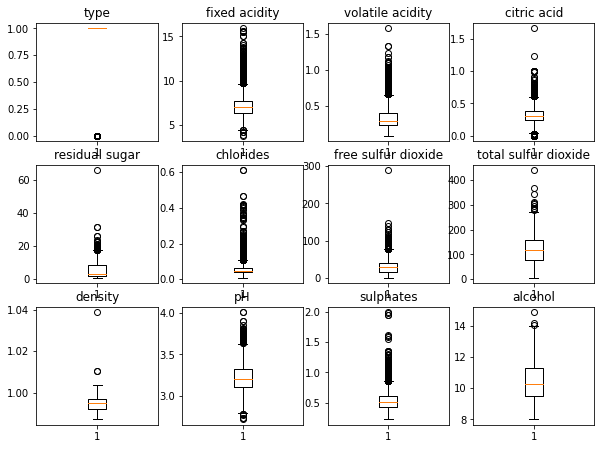

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
i = 1;
for z in X:
  plt.subplot(4,4,i)
  i = i+1
  plt.boxplot(X[z])
  plt.title(z)

In [ ]:
X.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
type,1.000000,-0.486913,-0.652606,0.187073,0.348982,-0.512596,0.471644,0.700357,-0.390645,-0.328514,-0.486662,0.032970
fixed acidity,-0.486913,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560
volatile acidity,-0.652606,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215
citric acid,0.187073,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431
residual sugar,0.348982,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656
chlorides,-0.512596,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844
free sulfur dioxide,0.471644,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838
total sulfur dioxide,0.700357,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740
density,-0.390645,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745
pH,-0.328514,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939


In [ ]:
y = pd.DataFrame(y, columns=['quality'])

In [ ]:
y.head()

,quality
0,6
1,6
2,6
3,6
4,6


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quality  6497 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB


In [ ]:
y.loc[(y['quality'] <= 5), 'quality']=0
y.loc[(y['quality'] <= 7) & (y['quality'] > 5), 'quality']=1
y.loc[(y['quality'] > 5), 'quality']=2

In [ ]:
y['quality'].value_counts()

1    3915
0    2384
2     198
Name: quality, dtype: int64

In [ ]:
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


Menentukan data testing dan data training

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(5197, 12)

In [ ]:
y_train.shape

y_train['quality'].value_counts()

1    3142
0    1902
2     153
Name: quality, dtype: int64

In [ ]:
X_test.shape

(1300, 12)

Memanggil fungsi klasifikasi Naive Bayes dan memasukkan data training pada klasifikasi Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# training the model
nb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

Menentukan hasil prediksi dari X_test

In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.63

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=32, n_estimators=120, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.8084615384615385

In [ ]:
rf.predict([[1,2,3,4,5,1,2,3,4,1,2,3]])

array([0])